## EEG Seizure Clasficiation using 1D CNN
This project uses the **BONN EEG Dataset** to train a **1D convolution neural network (CNN)** to distinguish **seizure vs non seizure EEG segments**. 
The Bonn dataset contains EEG recordings from healthy volunteers and epilepsy patients, with segments labeled as seizure (ictal) or non-seizure (interictal/healthy). The goal is to demonstrate a deep learning approach for automated seizure detection from single-channel EEG data.


## Dataset

**Bonn EEG dataset** contains **five sets (A–E)**, each with 100 single-channel EEG segments (~23.6 seconds each, 4097 samples per segment, 173.61 Hz sampling rate).  

| Set | Description | Seizure? |
|-----|------------|-----------|
| A   | Healthy, eyes open | No |
| B   | Healthy, eyes closed | No |
| C   | Interictal, non-epileptogenic | No |
| D   | Interictal, epileptogenic | No |
| E   | Seizure (ictal) | Yes |


Links:
- [Bonn EEG Dataset](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)
- [Original Paper: Andrzejak et al., 2001](https://www.upf.edu/documents/229517819/232450661/Andrzejak-PhysicalReviewE2001.pdf/0e9a54b8-8993-b400-743e-4d64fa29fb63)


## Goals

1. Load and preprocess EEG segments from all sets.  
2. Normalize and filter EEG signals.  
3. Prepare training and test datasets.  
4. Build and train a **1D CNN** to classify seizure vs non-seizure segments.  
5. Evaluate model performance using accuracy, F1-score, and confusion matrix.  
6. Visualize example EEG segments and model predictions.


In [1]:
import os
import numpy as np
from scipy.signal import butter, filtfilt
import sys
import importlib

In [4]:
sys.path.append(os.path.abspath(".."))
from scripts.preprocess import load_and_preprocess

base_path = os.path.abspath("../data")

# 0:non-seizure, 1: seizure 
folders = {
    "A": 0,
    "B": 0,
    "C": 0,
    "D": 0, 
    "E": 1
}

X, y = load_and_preprocess(base_path, folders)

print("EEG segments shape:", X.shape)
print("Labels shape:", y.shape)


X = np.array(X) 
print("EEG segments shape:", X.shape) # 500, 4097
y = np.array(y)
print("Labels shape:", y.shape)


EEG segments shape: (500, 4097)
Labels shape: (500,)
EEG segments shape: (500, 4097)
Labels shape: (500,)


In [5]:
from sklearn.model_selection import train_test_split

# X: shape (500, 4097), y: labels (0/1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (400, 4097)
Test shape: (100, 4097)


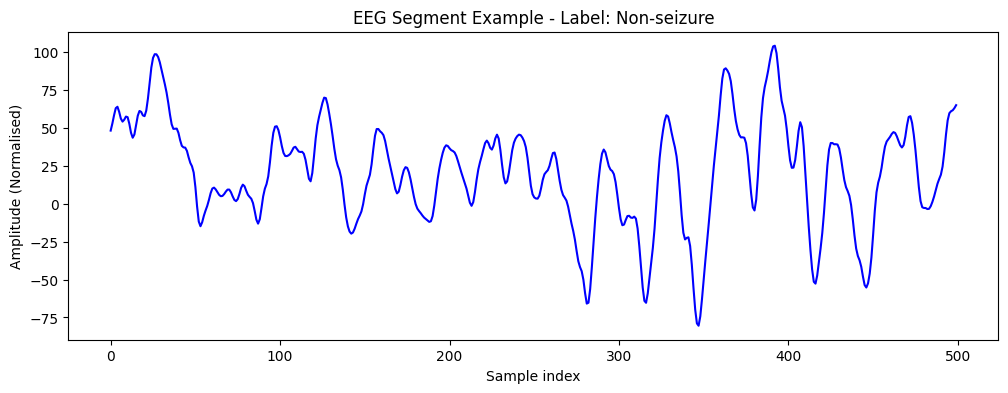

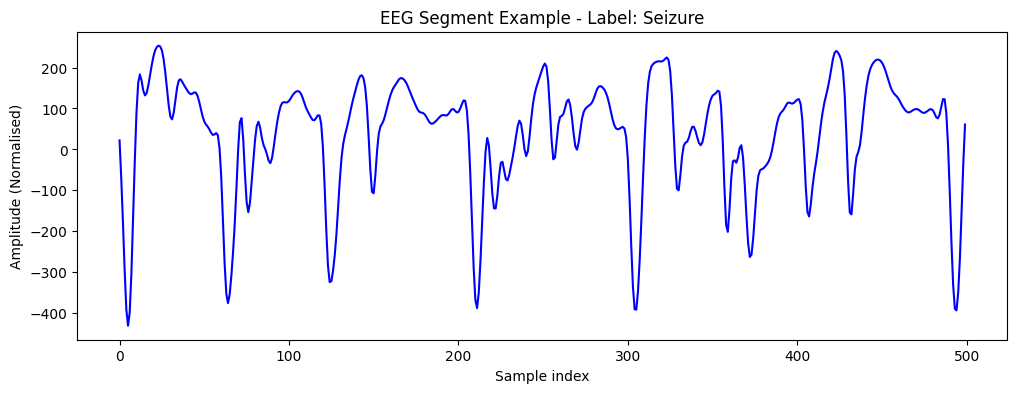

In [6]:
import matplotlib.pyplot as plt
from scripts.utils import plot_eeg_segment

# Example: first segment in X
segment = X_train[0]  # shape: (4097,)
label = y_train[0]    # 0 = non-seizure, 1 = seizure
plot_eeg_segment(segment, label)



# Example: first segment in X
segment = X_train[1]  # shape: (4097,)
label = y_train[1]    # 0 = non-seizure, 1 = seizure
plot_eeg_segment(segment, label)


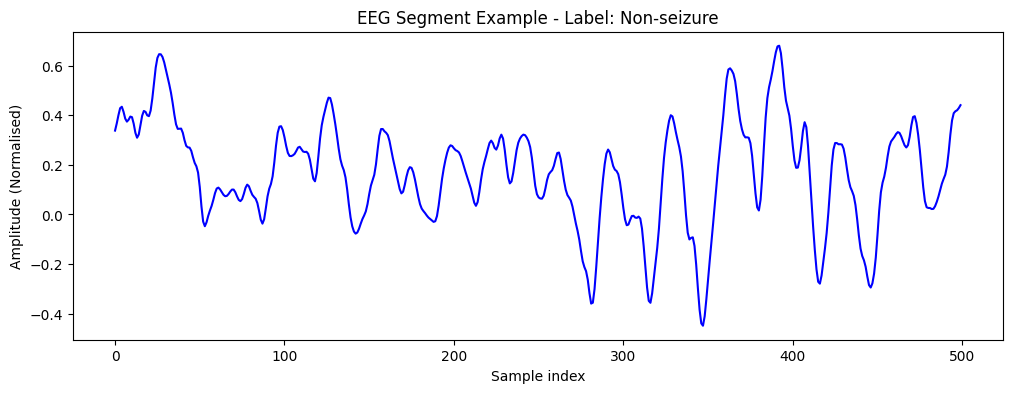

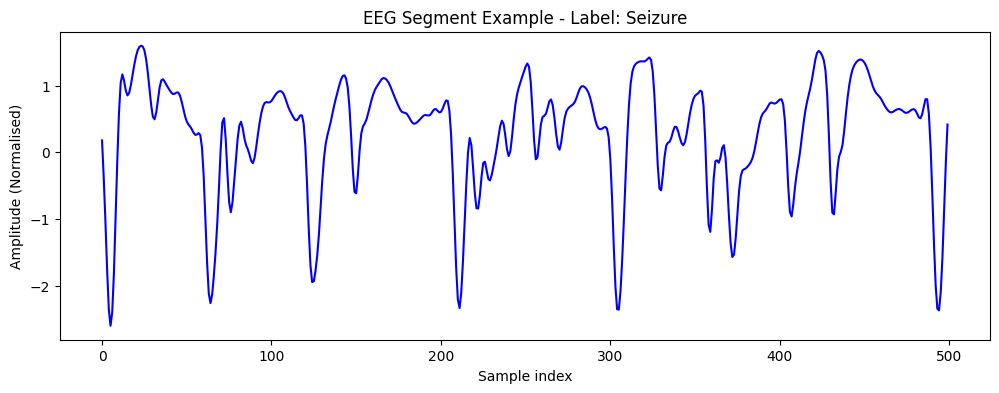

In [7]:
from scripts.preprocess import normalise_segments

X_train_normalised, X_test_normalised = normalise_segments(X_train, X_test)


segment = X_train_normalised[0]  # shape: (4097,)
label = y_train[0]    # 0 = non-seizure, 1 = seizure
plot_eeg_segment(segment, label)


# Example: first segment in X
segment = X_train_normalised[1]  # shape: (4097,)
label = y_train[1]    # 0 = non-seizure, 1 = seizure
plot_eeg_segment(segment, label)
